In [10]:
import re
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

import string

import matplotlib.pyplot as plt
def warn(*args, **kwargs):
    pass
import warnings
warnings.simplefilter('ignore')
warnings.warn = warn

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [11]:
# preprocess the string/song
def preprocess_string(s):
    # remove all non letter and numbers
    s = re.sub(r"[^\w\s]", "", s)

    # remove extra whitespaces
    s = re.sub(r"\d", "", s)

    return s

In [12]:
from nltk.tokenize import word_tokenize

def preprocess(song):
    tokens = word_tokenize(song)
    tokens = [preprocess_string(w) for w in tokens]
    return [
        w.lower() for w in tokens if len(w) != 0
        or
        not(w in string.punctuation)
    ]

In [14]:
song = """

Hold fast to dreams

For if dreams die

Life is a broken-winged bird

That cannot fly.

Hold fast to dreams

For when dreams go

Life is a barren field

Frozen with snow.

I think that I shall never see

A poem lovely as a tree.

A tree whose hungry mouth is prest

Against the earth’s sweet flowing breast;

A tree that looks at God all day,

And lifts her leafy arms to pray;

A tree that may in summer wear

A nest of robins in her hair;

Upon whose bosom snow has lain;

Who intimately lives with rain.

Poems are made by fools like me,

But only God can make a tree.

I met a traveller from an antique land

Who said: `Two vast and trunkless legs of stone

Stand in the desert. Near them, on the sand,

Half sunk, a shattered visage lies, whose frown,

And wrinkled lip, and sneer of cold command,

Tell that its sculptor well those passions read

Which yet survive, stamped on these lifeless things,

The hand that mocked them and the heart that fed.

And on the pedestal these words appear —

“My name is Ozymandias, king of kings:

Look on my works, ye Mighty, and despair!”

Nothing beside remains. Round the decay

Of that colossal wreck, boundless and bare

The lone and level sands stretch far away.’

The time will come

when, with elation

you will greet yourself arriving

at your own door, in your own mirror

and each will smile at the other’s welcome,

and say, sit here. Eat.

You will love again the stranger who was your self.

Give wine. Give bread. Give back your heart

to itself, to the stranger who has loved you

all your life, whom you ignored

for another, who knows you by heart.

Take down the love letters from the bookshelf,

the photographs, the desperate notes,

peel your own image from the mirror.

Sit. Feast on your life.

If you can keep your head when all about you

Are losing theirs and blaming it on you;

If you can trust yourself when all men doubt you,

But make allowance for their doubting too:

If you can wait and not be tired by waiting,

Or, being lied about, don’t deal in lies,

Or being hated don’t give way to hating,

And yet don’t look too good, nor talk too wise;

If you can dream- -and not make dreams your master;

If you can think- -and not make thoughts your aim,

If you can meet with Triumph and Disaster

And treat those two impostors just the same:.

If you can bear to hear the truth you’ve spoken

Twisted by knaves to make a trap for fools,

Or watch the things you gave your life to, broken,

And stoop and build’em up with worn-out tools;

If you can make one heap of all your winnings

And risk it on one turn of pitch-and-toss,

And lose, and start again at your beginnings,

And never breathe a word about your loss:

If you can force your heart and nerve and sinew

To serve your turn long after they are gone,

And so hold on when there is nothing in you

Except the Will which says to them: ‘Hold on! ‘

If you can talk with crowds and keep your virtue,

Or walk with Kings- -nor lose the common touch,

If neither foes nor loving friends can hurt you,

If all men count with you, but none too much:

If you can fill the unforgiving minute

With sixty seconds’ worth of distance run,

Yours is the Earth and everything that’s in it,

And- -which is more- -you’ll be a Man, my son!"""

In [16]:
tokens = preprocess(song)

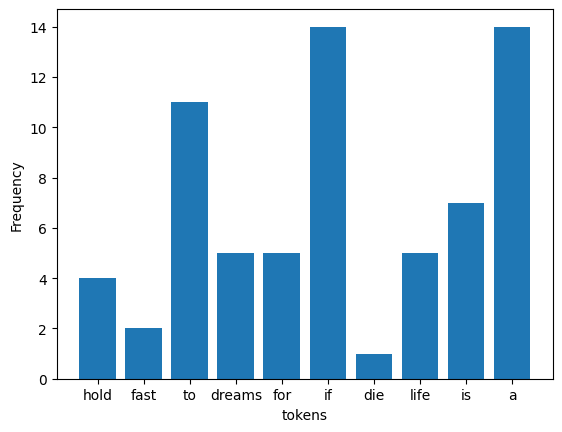

In [18]:
freqDis = nltk.FreqDist(tokens)

plt.bar(list(freqDis.keys())[0: 10], list(freqDis.values())[0:10])
plt.xlabel("tokens")
plt.ylabel("Frequency")
plt.show()

In [19]:
C = sum(freqDis.values())

print(freqDis["if"]/C)

0.022653721682847898


In [32]:
# create the bigram
bigrams = nltk.bigrams(tokens)

# vocabulary
vocabulary = set(tokens)

# convert the bigrams to a list to access them
my_bigrams = list(bigrams)

# in order for as to predict the next word, we need to see the frequency of the prev word and the target together
freq_bigrams = nltk.FreqDist(nltk.bigrams(tokens))

print(my_bigrams[0:10])

# example
print(freq_bigrams[('hold','fast')])


[('hold', 'fast'), ('fast', 'to'), ('to', 'dreams'), ('dreams', 'for'), ('for', 'if'), ('if', 'dreams'), ('dreams', 'die'), ('die', 'life'), ('life', 'is'), ('is', 'a')]
2


In [37]:
# now we can see how freq two words appear along each other, we can try to make a prediction based on this
word = "if"
vocab_probabilities = {}
for next_word in vocabulary:
    vocab_probabilities[next_word] = freq_bigrams[(word, next_word)] / freqDis[word]

vocab_probabilities = sorted(
    vocab_probabilities.items(),
    key=lambda  x: x[1],
    reverse=True
)

In [38]:
print(vocab_probabilities[0:4])

[('you', 0.7857142857142857), ('all', 0.07142857142857142), ('dreams', 0.07142857142857142), ('neither', 0.07142857142857142)]


In [44]:
def make_predictions(
        my_words,
        freq_grams,
        normalize=1,
        vocabulary=vocabulary
):
        """
        Given a sequence of words, this functions makes predictions on the  probability of the next word

        Args:
            my_words (list): A list of words in the input sequence.
            freq_gram(dict): A dictionary containing frequency of n-grams
            normalize (int): A normalization factor for calculating probabilities.
            vocabulary (list): A list of words in the vocabulary.

        Returns:
            list: A list of predicted words along with their probabilities, sorted in descending order.
    """

        # initialize the dict to store the probabilities
        vocab_probabilities = {}

        # context window
        context_size =  len(list(freq_grams.keys())[0])

        # generate the tokens
        tokens = preprocess(my_words)[0: context_size - 1]

        # make predictions
        for next_word in vocabulary:
            temp = tokens.copy()
            temp.append(next_word)

            if normalize != 0:
                vocab_probabilities[next_word] = freq_grams[(tuple(temp))] / normalize
            else:
                vocab_probabilities[next_word] = freq_grams[(tuple(temp))]

        # Sort the predicted words based on their probabilities in descending order
        vocab_probabilities = sorted(
            vocab_probabilities.items(),
            key = lambda x:x[1],
            reverse=True
        )

        return vocab_probabilities # Return the sorted list of predicted words and their probabilities

In [45]:
my_words = "if"
probailities = make_predictions(
    my_words=my_words,
    freq_grams=freq_bigrams,
    normalize=freqDis['are']
)

In [46]:
my_song=""
for w in tokens[0:100]:
  my_word=make_predictions(w,freq_bigrams)[0][0]
  my_song+=" "+my_word

In [47]:
print(my_song)

 fast to dreams for fools you for life is a tree bird that fed make make hold fast to dreams for fools all for life is a tree field frozen with snow i shall and fed shall never breathe a tree lovely as a tree that tree that frown mouth is a against the earth s sweet flowing breast a tree that fed at your all your and not her hair arms to dreams a tree that fed in your wear a tree of all in your hair upon whose frown snow i lain who said lives with snow poems
